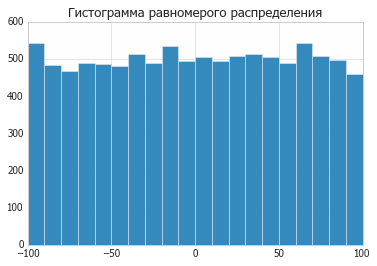

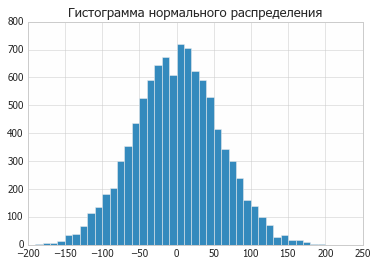

In [2]:
# -*- coding: utf-8 -*-

'''
Глава 10, рис. 1 и 2
'''

import math, random
from collections import Counter

import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline  

mpl.style.use('ggplot')  
mpl.style.use('seaborn-whitegrid')  
mpl.rcParams['axes.facecolor'] = u'fefefe'
#mpl.rcParams.update({'font.family': 'Ubuntu Condensed'})   
mpl.rcParams.update({'font.family': 'Tahoma'})

# ИФР нормального распределения
def normal_cdf(x, mu=0,sigma=1):
    return (1 + math.erf((x - mu) / math.sqrt(2) / sigma)) / 2

# обратная ИФР нормального распределения
# (tolerance - это константа точности)
def inverse_normal_cdf(p, mu=0, sigma=1, tolerance=0.00001):
    """найти приближенную инверсию при помощи бинарного поиска"""

    # если нормальное распределение не стандартное, вычислить стандартное и нормализовать
    if mu != 0 or sigma != 1:
        return mu + sigma * inverse_normal_cdf(p, tolerance=tolerance)

    low_z, low_p = -10.0, 0            # normal_cdf(-10) = (очень близко к) 0 
    hi_z,  hi_p  =  10.0, 1            # normal_cdf(10)  = (очень близко к) 1 
    while hi_z - low_z > tolerance:
        mid_z = (low_z + hi_z) / 2     # взять середину
        mid_p = normal_cdf(mid_z)      # и значение ИФР в этом месте 
        if mid_p < p:
            # значение середины все еще слишком низкое, искать выше его
            low_z, low_p = mid_z, mid_p
        elif mid_p > p:
            # значение середины все еще слишком высокое, искать ниже 
            hi_z, hi_p = mid_z, mid_p
        else:
            break

    return mid_z

# привести точку данных к номеру интервала 
def bucketize(point, bucket_size):
    """округлить точку до следующего наименьшего кратного    
    размера интервала bucket_size"""
    return bucket_size * math.floor(point / bucket_size)

# подготовить гистограмму
def make_histogram(points, bucket_size):
    """сгруппировать точки и подсчитать количество в интервале"""
    return Counter(bucketize(point, bucket_size) for point in points)

# изобразить гистограмму 
def plot_histogram(points, bucket_size, title, fname):
    fig = plt.figure()

    histogram = make_histogram(points, bucket_size)
    plt.bar(histogram.keys(), histogram.values(), width=bucket_size)
    plt.title(title, fontsize=13)
    plt.show()
    #fig.savefig(fname, dpi=300, bbox_inches='tight', facecolor='w') 


def compare_two_distributions():
    random.seed(0)

    # равномерно распределенные между -100 и 100
    uniform = [200 * random.random() - 100 for _ in range(10000)]

    # нормально распределенные с нулевым средним, стандартным отклонением 57
    normal = [57 * inverse_normal_cdf(random.random())
              for _ in range(10000)]


    plot_histogram(uniform, 10, "Гистограмма равномерого распределения", "fig_10-1")
    plot_histogram(normal, 10, "Гистограмма нормального распределения", "fig_10-2")
    
compare_two_distributions()